Processing image: images/phase2_000000000.000000.png


,RGB,counts,labels,colors,fraction
0,"[121, 254, 89]",1332313,[121 254 89],GREEN,0.340240
2,"[200, 0, 0]",1324845,[200 0 0],RED,0.338333
4,"[255, 255, 255]",1121354,[255 255 255],WHITE,0.286366
1,"[192, 192, 192]",115064,[192 192 192],GRAY,0.029385
3,"[222, 62, 7]",22225,[222 62 7],ORANGE,0.005676


Processing image: images/phase2_000000000.000000_output.png


,RGB,counts,labels,colors,fraction
0,"[121, 254, 89]",1347742,[121 254 89],GREEN,0.344180
2,"[200, 0, 0]",1335726,[200 0 0],RED,0.341112
4,"[255, 255, 255]",1116997,[255 255 255],WHITE,0.285254
1,"[192, 192, 192]",115064,[192 192 192],GRAY,0.029385
3,"[222, 62, 7]",272,[222 62 7],ORANGE,0.000069


Processing image: images/phase2_000000000.726308.png


,RGB,counts,labels,colors,fraction
4,"[255, 255, 255]",1151411,[255 255 255],WHITE,0.294042
2,"[200, 0, 0]",1012483,[200 0 0],RED,0.258563
0,"[121, 254, 89]",985793,[121 254 89],GREEN,0.251747
3,"[222, 62, 7]",651050,[222 62 7],ORANGE,0.166262
1,"[192, 192, 192]",115064,[192 192 192],GRAY,0.029385


Processing image: images/phase2_000000000.726308_output.png


,RGB,counts,labels,colors,fraction
0,"[121, 254, 89]",1333326,[121 254 89],GREEN,0.340499
2,"[200, 0, 0]",1328589,[200 0 0],RED,0.339289
4,"[255, 255, 255]",1116422,[255 255 255],WHITE,0.285107
1,"[192, 192, 192]",115064,[192 192 192],GRAY,0.029385
3,"[222, 62, 7]",22400,[222 62 7],ORANGE,0.005720


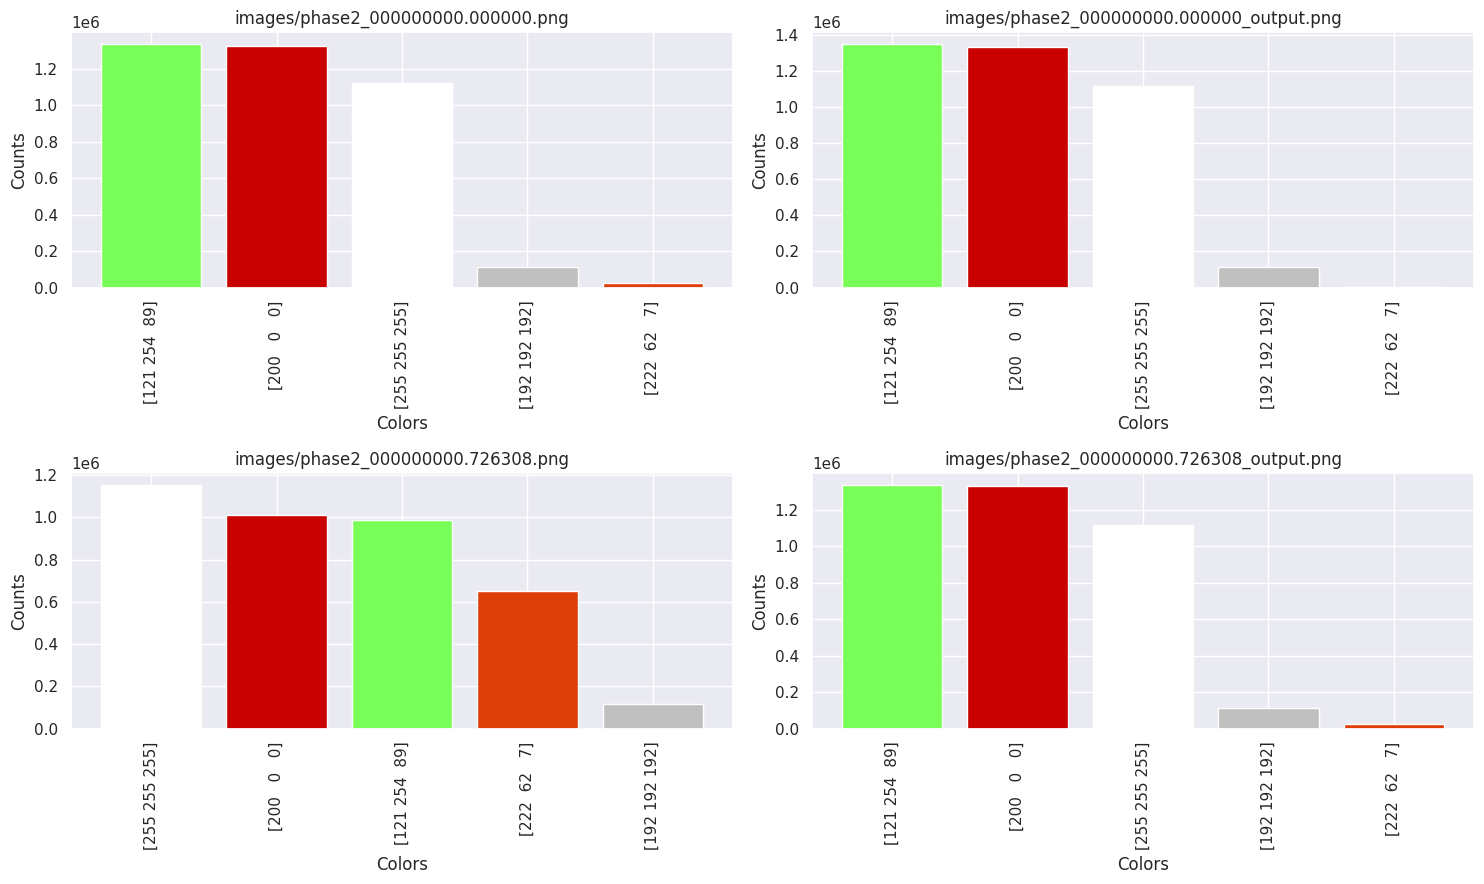

In [6]:
import seaborn as sns
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def load_image(image_path):
    """Load an image and convert it to a numpy array."""
    image = Image.open(image_path)
    return np.array(image)

def get_colors(image_np):
    """Get unique colors and their counts from the image numpy array."""
    colors, counts = np.unique(image_np.reshape(-1, image_np.shape[2]), axis=0, return_counts=True)
    return colors, counts

def get_color_name(rgb:np.array):
    """Get the name of the color using the RGB values."""
    # [121 254  89] -> GREEN
    # [255 255 255] -> WHITE
    # [200   0   0]	-> RED
    # [192 192 192] -> GRAY
    # [222  62   7] -> ORANGE

    if np.array_equal(rgb, [121, 254, 89]):
        return 'GREEN'
    elif np.array_equal(rgb, [255, 255, 255]):
        return 'WHITE'
    elif np.array_equal(rgb, [200, 0, 0]):
        return 'RED'
    elif np.array_equal(rgb, [192, 192, 192]):
        return 'GRAY'
    elif np.array_equal(rgb, [222, 62, 7]):
        return 'ORANGE'
    else:
        return 'UNKNOWN'    

def create_dataframe(colors, counts):
    """Create a dataframe with colors and their counts."""
    df = pd.DataFrame({'RGB': colors.tolist(), 'counts': counts})
    df['RGB'] = df['RGB'].apply(lambda x: np.array(x))
    df['labels'] = df['RGB'].apply(lambda x: str(x))
    df['colors'] = df['RGB'].apply(lambda x: get_color_name(x))
    df['fraction'] = df['counts'] / df['counts'].sum()
    df.sort_values('counts', ascending=False, inplace=True)
    display(df)
    return df

def plot_color_histogram(df, ax, image_path):
    """Plot a bar chart of the colors using seaborn."""
    ax.bar(df['labels'], df['counts'], color=df['RGB'] / 255.0)
    ax.set_xlabel('Colors')
    ax.set_ylabel('Counts')
    ax.set_title(f'{image_path}')
    ax.set_xticks(range(len(df['labels'])))
    ax.set_xticklabels(df['labels'], rotation=90)

def main(image_paths):
    sns.set_theme(style="darkgrid")
    fig, axes = plt.subplots(2, 2, figsize=(15, 9))
    axes = axes.flatten()
    
    for i, image_path in enumerate(image_paths):
        print(f'Processing image: {image_path}')
        image_np = load_image(image_path)
        colors, counts = get_colors(image_np)
        df = create_dataframe(colors, counts)
        plot_color_histogram(df, axes[i], image_path)

    plt.tight_layout()
    plt.show()

# List of images to process
image_paths = [
    'images/phase2_000000000.000000.png',
    'images/phase2_000000000.000000_output.png',
    # 'images/phase2_000000000.012230.png',
    # 'images/phase2_000000000.078139.png',
    'images/phase2_000000000.726308.png',
    'images/phase2_000000000.726308_output.png',
]

# Run the main workflow
main(image_paths)
